<a href="https://colab.research.google.com/github/Dharma15teja/Skin-disease-detection-cnn/blob/main/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_folder_name = "/content/drive/MyDrive/Colab Notebooks/Newdataset/train (1)"

In [ ]:
import os
import shutil
import numpy as np
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
def base_preprocess(image):

    return image / 255.0

image_gen = ImageDataGenerator(
    brightness_range=[0.3, 1.0],
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=30,
    preprocessing_function=base_preprocess,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

In [ ]:

data = image_gen.flow_from_directory(
    dataset_folder_name,
    target_size=(240, 240),
    color_mode = 'rgb',
    batch_size=16,
    class_mode="sparse",
    shuffle=True
)



Found 2368 images belonging to 2 classes.


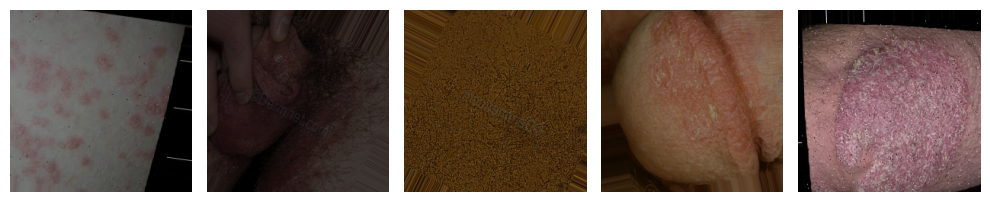

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(data)

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import KFold , train_test_split
X, y = [], []
for _ in range(len(data)):
    images, labels = next(data)
    X.append(images)
    y.append(labels)

X = np.concatenate(X, axis=0)
y = np.concatenate(y, axis=0)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

fold_no = 1
for train_index, test_index in kf.split(X):
    print(f"Training Fold {fold_no}")


    X_train_full, X_test = X[train_index], X[test_index]
    y_train_full, y_test = y[train_index], y[test_index]


    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.2, random_state=42
    )

print(f"Fold {fold_no}: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}")
fold_no += 1






Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Training Fold 1
Fold 1: Train=1705, Val=427, Test=236


In [ ]:
pip install keract

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D,Dropout
from tensorflow.keras.models import Model

In [ ]:

input_shape = (240,240, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = True

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, kernel_regularizer='l2', activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output)

In [ ]:
import tensorflow as tf


optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, mode='max', min_lr=0.00001, verbose=1)
model_r = ModelCheckpoint('model_best.keras', save_best_only=True, monitor='val_accuracy', verbose=1)


callback_list = [model_r, lr]

In [ ]:
 history=model.fit( X_train, y_train, validation_data=(X_val, y_val),  epochs =20, batch_size = 30, callbacks=callback_list)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.7980 - loss: 4.8601
Epoch 1: val_accuracy improved from -inf to 0.55504, saving model to model_best.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8001 - loss: 4.8543 - val_accuracy: 0.5550 - val_loss: 6.5707 - learning_rate: 1.0000e-04
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9973 - loss: 3.9725
Epoch 2: val_accuracy did not improve from 0.55504
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 326ms/step - accuracy: 0.9973 - loss: 3.9702 - val_accuracy: 0.5550 - val_loss: 5.3768 - learning_rate: 1.0000e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.9967 - loss: 3.4579
Epoch 3: val_accuracy did not improve from 0.55504

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.9967 - loss: 3.4559 - val_accuracy: 0.5550 - val_loss: 4.9132 - learning_rate: 1.0000e-04
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 

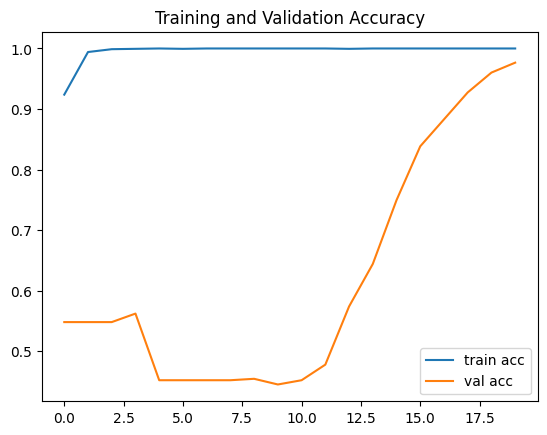

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 506ms/step


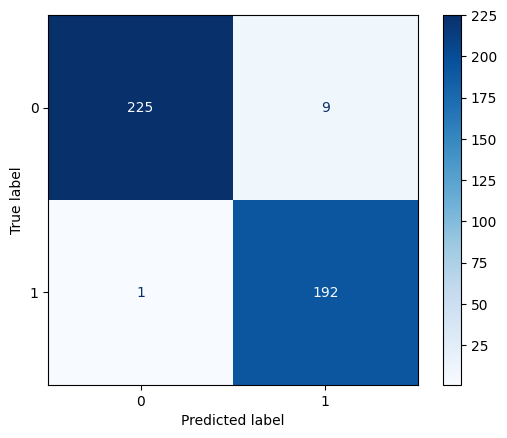

Accuracy: 0.9765807962529274
Precision: 0.9552238805970149
Recall: 0.9948186528497409
F1 Score: 0.9746192893401016


In [ ]:








import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the validation set
y_pred = model.predict(X_val, verbose=1)

# For binary classification, convert the predictions to binary (0 or 1)
y_pred_binary = np.argmax(y_pred, axis = 1)  # Ensure it's binary (0 or 1)

# y_val contains the true labels from the validation set (these are sparse integers)
# Use y_val directly instead of accessing X_val.classes
y_true = y_val  # This is the true class labels (0 or 1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Optionally, calculate other metrics like accuracy, precision, recall, F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true, y_pred_binary)
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


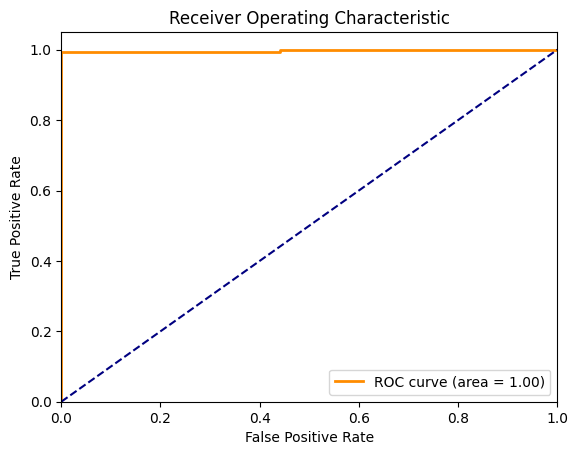

In [ ]:
# Calculate the probabilities for the positive class
y_probs = model.predict(X_val, verbose=1)[:, 1]

# Calculate the ROC curve
from sklearn.metrics import roc_curve, auc

# Assuming you have y_true (true labels) and y_probs (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_true, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
